## Data Collection

In [17]:
import numpy as np
import pandas as pd

#### Collecting OHLC data of Apple using the yfinance library

In [18]:
import yfinance as yf

symbol = 'AAPL'
start_date = '2015-01-01'
end_date = '2025-01-19'

stock_data = yf.download(symbol, start = start_date, end = end_date)

stock_data.head()

/var/folders/p9/wg3vtxhs1p1fv0539hxmwpyh0000gn/T/ipykernel_18951/837040907.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2015-01-06,23.606550,23.866475,23.244431,23.668754,263188400
2015-01-07,23.937576,24.037547,23.704309,23.815388,160423600
2015-01-08,24.857302,24.915063,24.148616,24.266361,237458000


In [21]:
stock_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

## Data Preproccessing and Cleaning

#### Adding indicators as extra features to improve performance using the talib library

In [22]:
import talib as ta

# Extract individual columns from multi-level DataFrame
close_prices = stock_data[('Close', 'AAPL')].astype(np.float64).to_numpy()
high_prices = stock_data[('High', 'AAPL')].astype(np.float64).to_numpy()
low_prices = stock_data[('Low', 'AAPL')].astype(np.float64).to_numpy()

# Adding MACD, RSI, SMA, EMA, and ADX indicators
macd, macd_signal, _ = ta.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
rsi = ta.RSI(close_prices, timeperiod=14)
sma_20 = ta.SMA(close_prices, timeperiod=20)
ema_20 = ta.EMA(close_prices, timeperiod=20)
adx = ta.ADX(high_prices, low_prices, close_prices, timeperiod=14)

stock_data['MACD'] = macd
stock_data['MACD_signal'] = macd_signal
stock_data['RSI'] = rsi
stock_data['SMA_20'] = sma_20
stock_data['EMA_20'] = ema_20
stock_data['ADX'] = adx

stock_data.dropna(inplace=True)

stock_data.tail()


Price,Close,High,Low,Open,Volume,MACD,MACD_signal,RSI,SMA_20,EMA_20,ADX
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2025-01-13,233.835922,234.105277,229.167192,232.968021,49630700,-0.532621,2.104453,34.659192,248.002254,244.187794,30.663653
2025-01-14,232.718613,235.551775,231.910564,234.185076,39435300,-1.330973,1.417368,33.488062,247.270020,243.095491,30.551699
2025-01-15,237.297562,238.384950,233.865838,234.075339,39832000,-1.576023,0.818690,42.119723,246.758253,242.543307,29.690225
2025-01-16,227.710693,237.437230,227.481251,236.778830,71759100,-2.514818,0.151988,32.584999,245.621995,241.130677,29.858063
2025-01-17,229.426559,231.730998,227.930169,231.561409,68488300,-3.084803,-0.495370,35.403529,244.449823,240.016000,30.013913


In [23]:
df = stock_data

In [24]:
# Dropping unecessary columns which mostly won't contribute to the model
df = df.drop(['Open', 'High', 'Low'], axis=1)
df.head()

Price,Close,Volume,MACD,MACD_signal,RSI,SMA_20,EMA_20,ADX
Ticker,AAPL,AAPL,,,,,,
Date,,,,,,,,
2015-02-20,28.883059,195793600,1.240585,1.123162,75.666472,26.907616,27.086306,36.603319
2015-02-23,29.663679,283896400,1.296509,1.157831,79.466573,27.135827,27.331770,38.622133
2015-02-24,29.478559,276912400,1.310781,1.188421,76.418768,27.353449,27.536226,40.580201
2015-02-25,28.724697,298846800,1.246888,1.200114,65.415803,27.577365,27.649414,40.587079
2015-02-26,29.088249,365150000,1.211621,1.202416,67.821983,27.750923,27.786446,39.815910


## Splitting Data into Training and Testing Sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# First split the RAW data before scaling
train_raw, test_raw = train_test_split(df, test_size=0.2, shuffle=False)

# Initialize scaler
scaler = MinMaxScaler()

# Fit ONLY on training data
scaled_train = scaler.fit_transform(train_raw)
scaled_test = scaler.transform(test_raw)

# Convert back to DataFrames (important for sequence creation)
train_df = pd.DataFrame(scaled_train, columns=df.columns, index=train_raw.index)
test_df = pd.DataFrame(scaled_test, columns=df.columns, index=test_raw.index)

train_df.head()

Price,Close,Volume,MACD,MACD_signal,RSI,SMA_20,EMA_20,ADX
Ticker,AAPL,AAPL,,,,,,
Date,,,,,,,,
2015-02-20,0.052125,0.261718,0.559061,0.546670,0.784266,0.035969,0.034938,0.445558
2015-02-23,0.057065,0.405294,0.563099,0.549462,0.838813,0.037474,0.036577,0.478896
2015-02-24,0.055894,0.393913,0.564129,0.551926,0.795064,0.038908,0.037942,0.511230
2015-02-25,0.051122,0.429658,0.559516,0.552867,0.637125,0.040385,0.038698,0.511344
2015-02-26,0.053423,0.537709,0.556970,0.553053,0.671664,0.041529,0.039613,0.498609


In [26]:
sequence_length = 30

# Fucntion to create sequences
def create_sequences(data, sequence_length, stride=5):
    sequences = []
    for i in range(0, len(data) - sequence_length, stride):
        seq = data.iloc[i : i + sequence_length].values
        sequences.append(seq)
    return np.array(sequences)


train_sequences = create_sequences(train_df, sequence_length)
test_sequences = create_sequences(test_df, sequence_length)

# Assign directly to X_train/X_test
X_train = train_sequences
X_test = test_sequences

print("Training sequence shape:", X_train.shape)
print("Testing sequence shape:", X_test.shape)

Training sequence shape: (393, 30, 8)
Testing sequence shape: (94, 30, 8)


## Building LSTM Model

In [27]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, models, Input # type: ignore

sequence_length = 30
num_features = X_train.shape[2]

inputs = Input(shape=(sequence_length, num_features))

# --- Encoder ---
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)
x = layers.LayerNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Bidirectional(layers.LSTM(32, return_sequences=False))(x)
x = layers.LayerNormalization()(x)

# --- Bottleneck ---
x = layers.RepeatVector(sequence_length)(x)

# --- Decoder ---
x = layers.LSTM(32, return_sequences=True)(x)
x = layers.LayerNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LayerNormalization()(x)

outputs = layers.TimeDistributed(layers.Dense(num_features))(x)

autoencoder = models.Model(inputs, outputs)


In [28]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 30, 128)        │        37,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_4           │ (None, 30, 128)        │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_5           │ (None, 64)             │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 30, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_6           │ (None, 30, 32)         │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_7           │ (None, 30, 64)         │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 30, 8)          │           520 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,936 (456.78 KB)

 Trainable params: 116,936 (456.78 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training 

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # type: ignore

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

X_train_noisy = X_train + np.random.normal(0, 0.01, X_train.shape)

history = autoencoder.fit(
    X_train_noisy, X_train,  # Training on noisy, predicting clean
    epochs=50,
    batch_size=64,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.8630 - val_loss: 0.7095 - learning_rate: 1.0000e-04
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4818 - val_loss: 0.3740 - learning_rate: 1.0000e-04
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3234 - val_loss: 0.2037 - learning_rate: 1.0000e-04
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2447 - val_loss: 0.1502 - learning_rate: 1.0000e-04
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1996 - val_loss: 0.1251 - learning_rate: 1.0000e-04
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1660 - val_loss: 0.1124 - learning_rate: 1.0000e-04
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1493 - val_loss: 0.1054 - learning_rate: 1.0000e-04
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1278 - val_loss: 0.0971 - learning_rate: 1.0000e-04
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1197 - val_loss: 0.0867 - learning_rate: 1.0000e-04


## Data Visualization

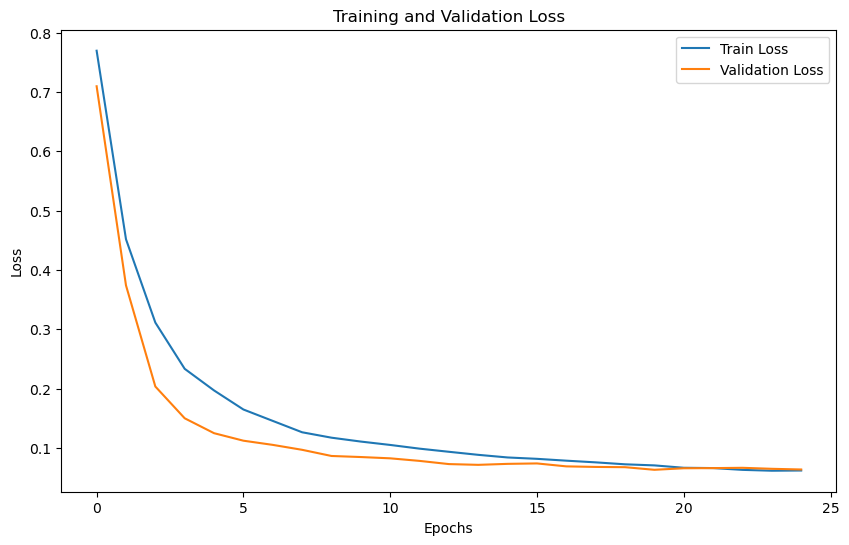

In [30]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Threshold: 0.3111353609254484
Number of anomalies detected: 129
Sample anomaly dates: DatetimeIndex(['2023-04-03', '2023-04-04', '2023-04-05', '2023-04-05',
               '2023-04-05', '2023-04-06', '2023-04-06', '2023-04-10',
               '2023-04-10', '2023-04-11'],
              dtype='datetime64[ns]', name='Date', freq=None)


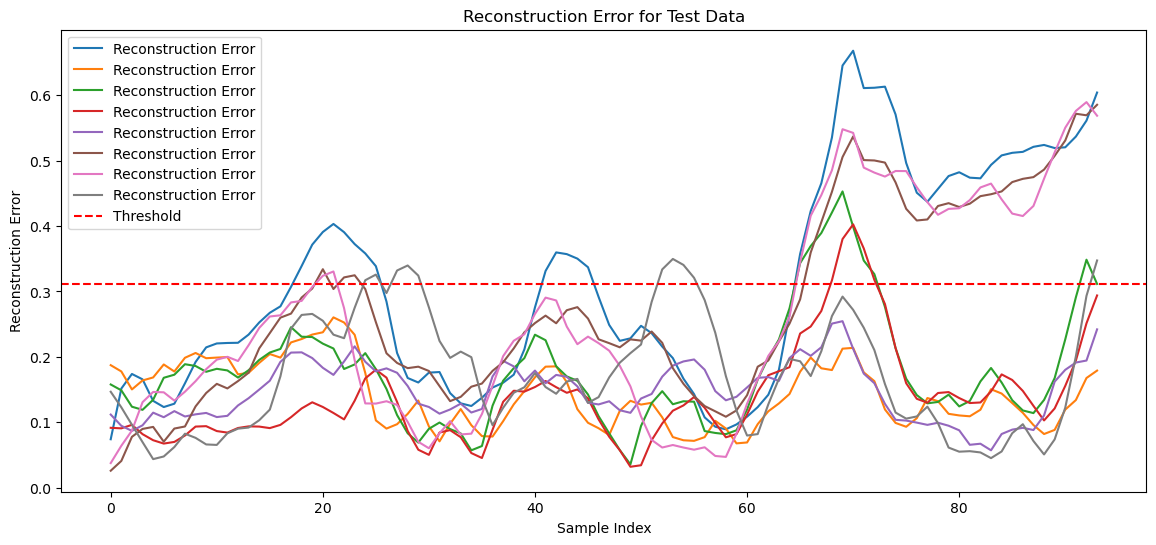

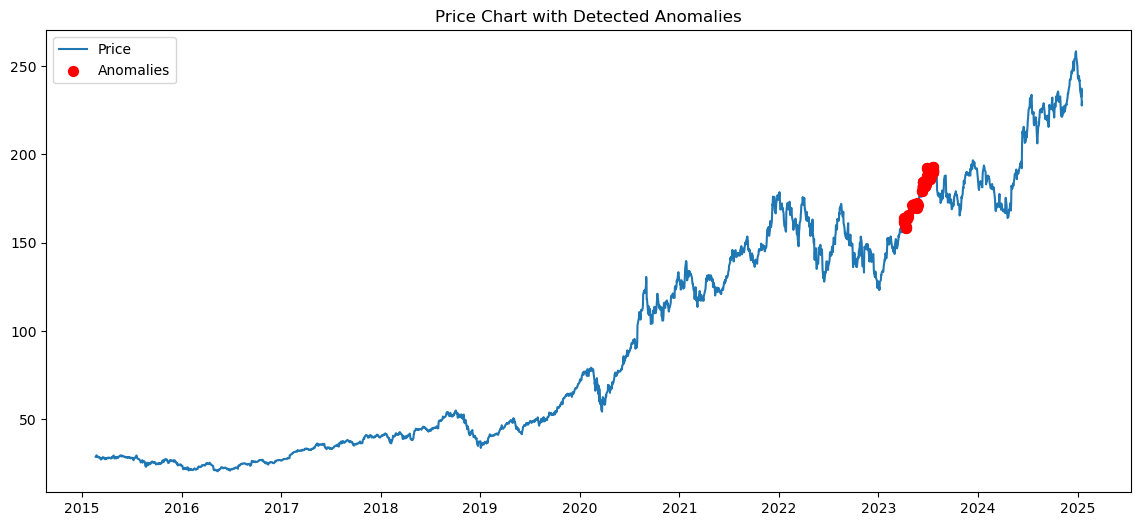

In [31]:
# Calculate reconstruction errors
train_reconstructed = autoencoder.predict(X_train, verbose=0)
test_reconstructed = autoencoder.predict(X_test, verbose=0)

train_error = np.mean(np.abs(train_reconstructed - X_train), axis=1)
test_error = np.mean(np.abs(test_reconstructed - X_test), axis=1)


threshold = np.percentile(train_error, 99)  
anomalies = test_error > threshold

print(f"Threshold: {threshold}")
print(f"Number of anomalies detected: {np.sum(anomalies)}")

anomaly_indices = np.where(anomalies)[0]
anomaly_dates = test_df.index[anomaly_indices + sequence_length]

print("Sample anomaly dates:", anomaly_dates[:10])

# Plot reconstruction errors
plt.figure(figsize=(14, 6))
plt.plot(test_error, label='Reconstruction Error')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Test Data')
plt.legend()
plt.show()

# Plot price with anomalies
plt.figure(figsize=(14, 6))
plt.plot(stock_data['Close'], label='Price')
plt.scatter(anomaly_dates, stock_data.loc[anomaly_dates, 'Close'], 
            color='red', s=50, zorder=5, label='Anomalies')
plt.title('Price Chart with Detected Anomalies')
plt.legend()
plt.show()